In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

### EDA

In [24]:
data=pd.read_csv('data/titanic.csv')
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
data.shape

(891, 12)

In [28]:
data.size

10692

In [30]:
lb=LabelEncoder()
data['Name']=lb.fit_transform(data['Name'])
data['Sex']=lb.fit_transform(data['Sex'])
data['Ticket']=lb.fit_transform(data['Ticket'])
data['Cabin']=lb.fit_transform(data['Cabin'])
data['Embarked']=lb.fit_transform(data['Embarked'])

In [32]:
data.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [34]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [36]:
data.isna().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [38]:
data.duplicated().sum()

0

In [40]:
data.dtypes

PassengerId      int64
Name             int32
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
Survived         int64
dtype: object

In [42]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,108,3,1,22.0,1,0,523,7.2500,147,2,0
1,2,190,1,0,38.0,1,0,596,71.2833,81,0,1
2,3,353,3,0,26.0,0,0,669,7.9250,147,2,1
3,4,272,1,0,35.0,1,0,49,53.1000,55,2,1
4,5,15,3,1,35.0,0,0,472,8.0500,147,2,0


### Outlier Detection

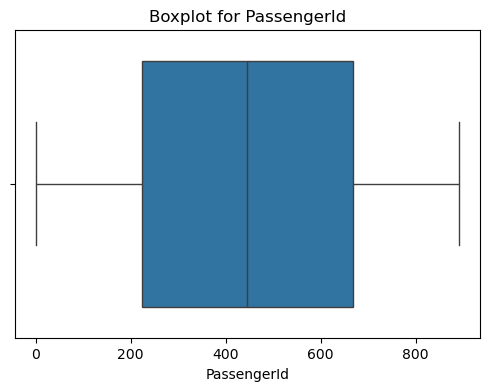

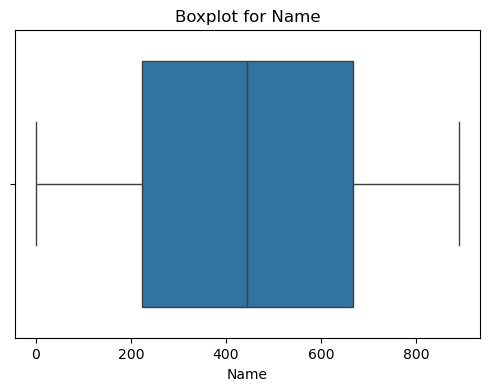

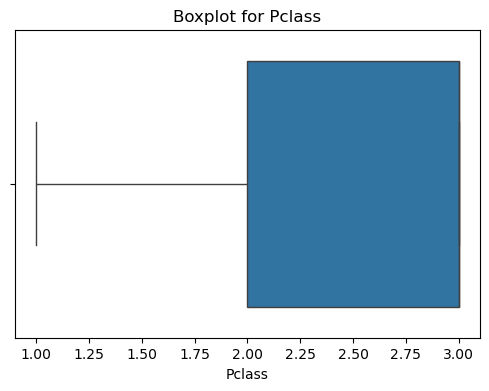

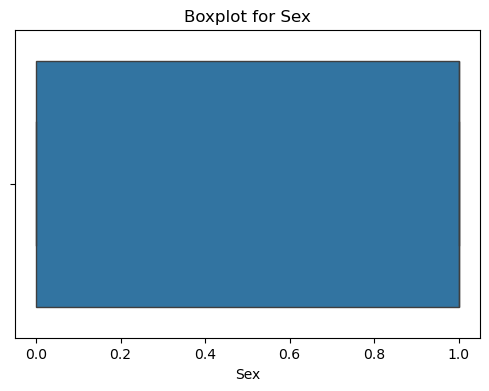

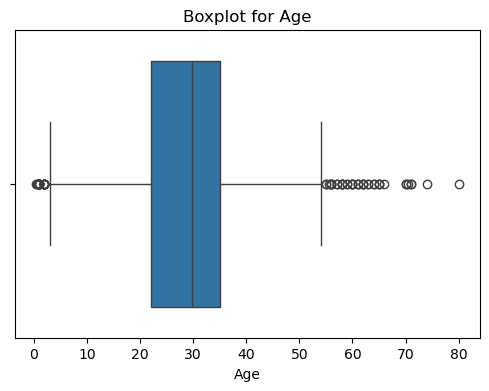

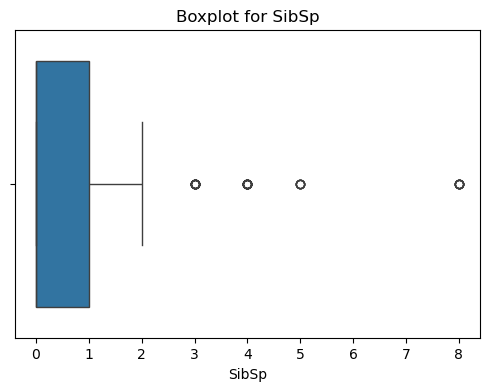

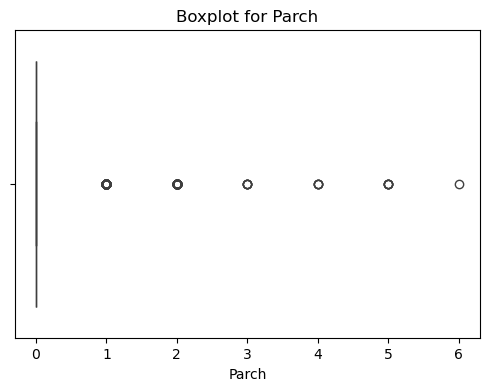

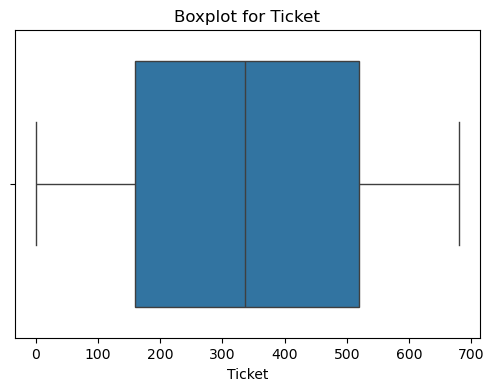

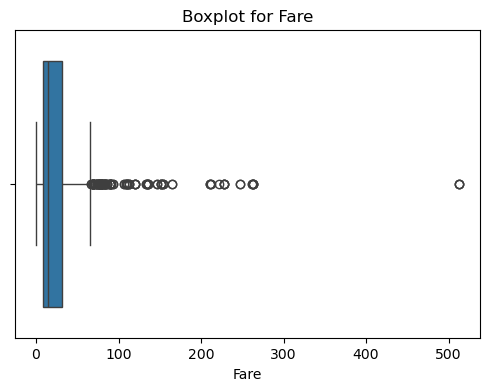

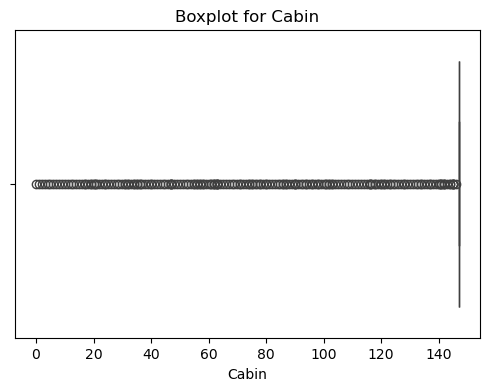

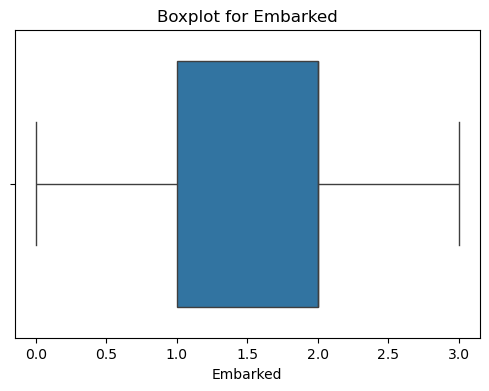

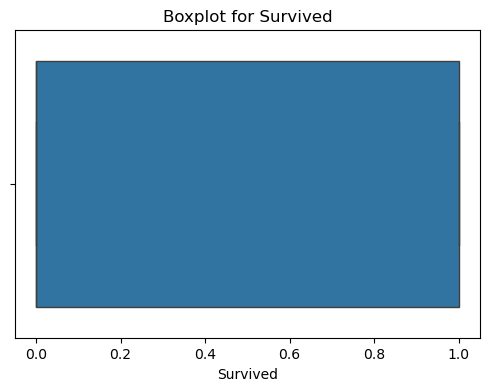

In [44]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [46]:
def handle_outliers_clip(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   PassengerId  Name  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1   108       3    1  22.0    1.0      0     523   7.2500    147   
1            2   190       1    0  38.0    1.0      0     596  65.6344    147   
2            3   353       3    0  26.0    0.0      0     669   7.9250    147   
3            4   272       1    0  35.0    1.0      0      49  53.1000    147   
4            5    15       3    1  35.0    0.0      0     472   8.0500    147   

   Embarked  Survived  
0         2         0  
1         0         1  
2         2         1  
3         2         1  
4         2         0  


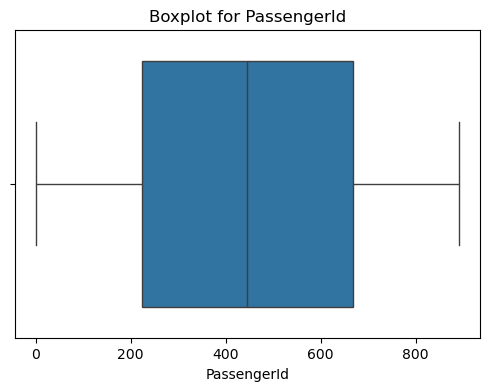

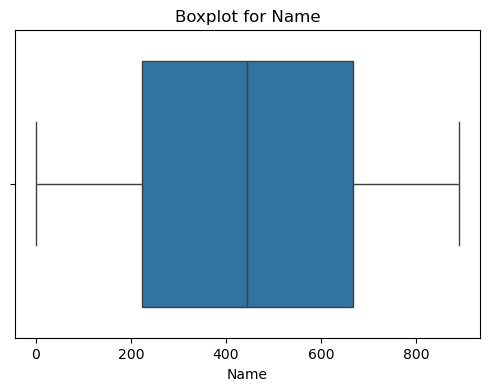

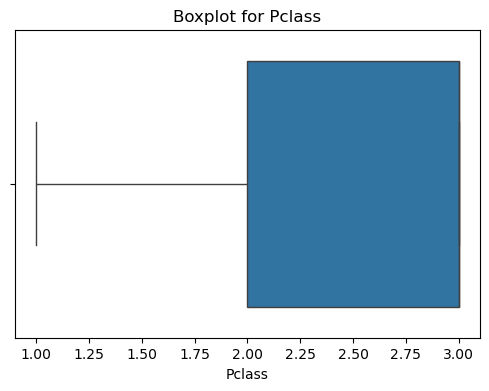

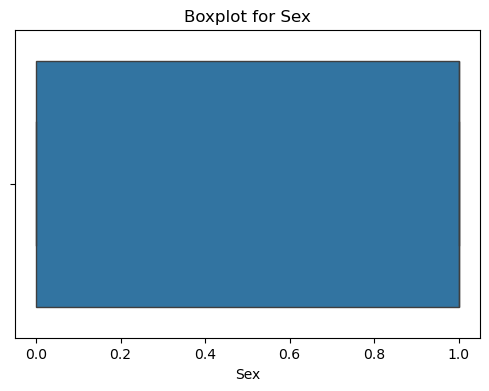

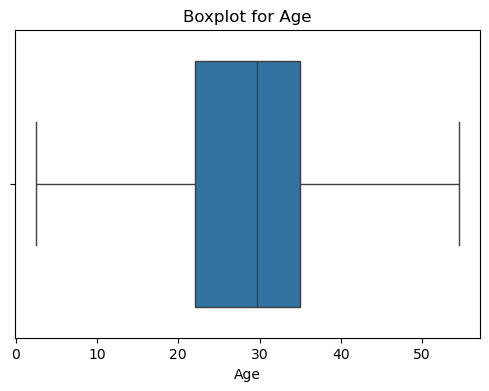

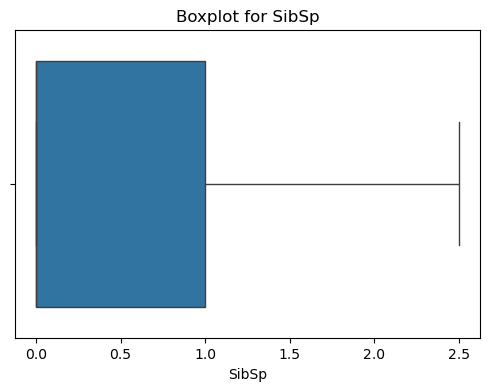

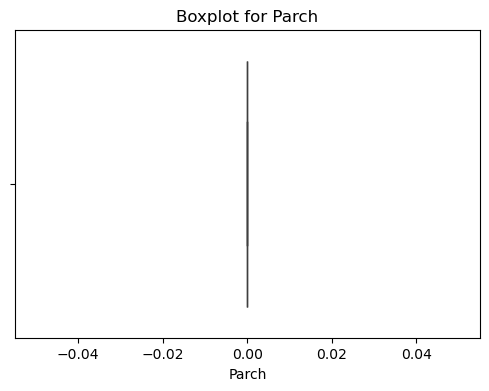

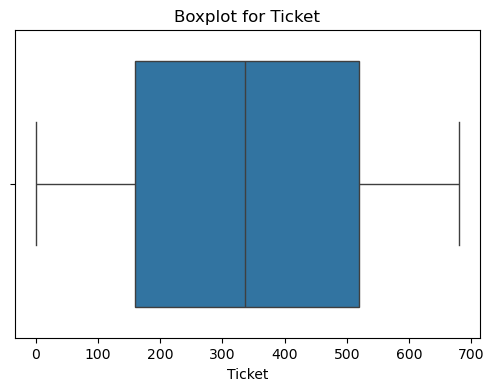

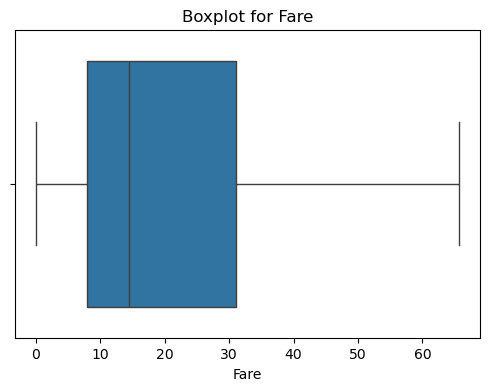

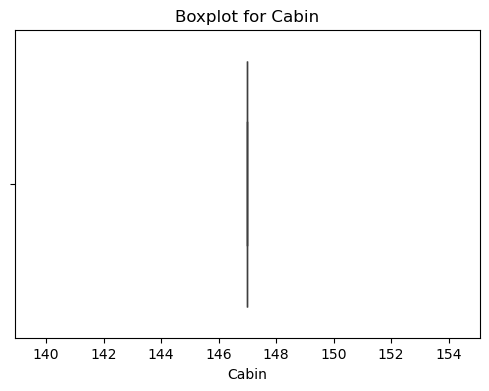

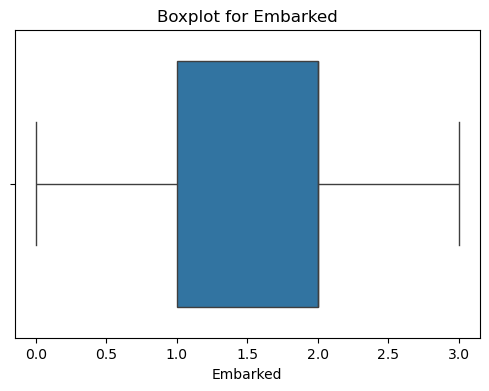

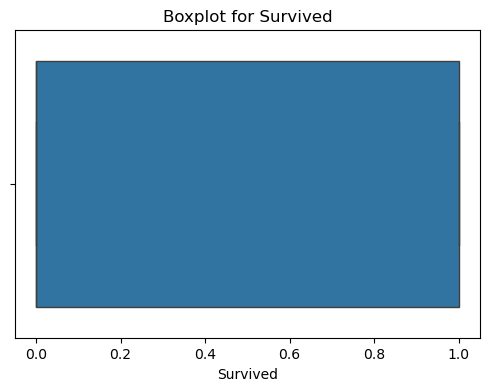

In [48]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting dataset

In [54]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Modeling

In [56]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42,learning_rate=0.3)
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 81.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Logistic Regression Accuracy: 82.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

SVM Accuracy: 78.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accura

In [34]:
#END